In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(np.__version__)

2.2.0
1.18.4


In [30]:
ds = tf.data.Dataset.from_tensor_slices([1,2,3,4])
print(type(ds))
for line in ds:
    print(line)

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [31]:
ds = tf.data.Dataset.from_tensors([1,2,3,4])
print(type(ds))
for line in ds:
    print(line)

<class 'tensorflow.python.data.ops.dataset_ops.TensorDataset'>
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


In [32]:
t = tf.constant([[1,2],[3,4]])
for line in ds:
    print(line)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


In [33]:
t = tf.constant([[1,2],[3,4]])
ds = tf.data.Dataset.from_tensors({"a":t,"b":t})
for line in ds:
    print(line)
    break

{'a': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>, 'b': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>}


In [34]:
t = tf.constant([[1,2],[3,4]])
ds = tf.data.Dataset.from_tensor_slices({"a":t,"b":t})
for line in ds:
    print(line)
    break

{'a': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>, 'b': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>}


In [35]:
dataset1 = tf.data.Dataset.from_tensors(np.zeros(shape=(10,5,2),dtype=np.float32))
for line in dataset1:
    print(line.shape)
    break

(10, 5, 2)


In [36]:
dataset2 = tf.data.Dataset.from_tensor_slices(np.zeros(shape=(10,5,2),dtype=np.float32))
for line in dataset2:
    print(line.shape)
    break

(5, 2)


In [37]:
dataset3 = tf.data.Dataset.from_tensors({"a":np.zeros(shape=(10,5,2),dtype=np.float32),"b":np.zeros(shape=(10,5,2),dtype=np.float32)})
for line in dataset3:
    print(line['a'].shape,line['b'].shape)
    break

(10, 5, 2) (10, 5, 2)


In [38]:
dataset4 = tf.data.Dataset.from_tensor_slices({"a":np.zeros(shape=(10,5,2),dtype=np.float32),"b":np.zeros(shape=(10,5,2),dtype=np.float32)})
for line in dataset4:
    print(line['a'].shape,line['b'].shape)
    break

(5, 2) (5, 2)


### tensorflow官网实例

In [39]:
# 对list数据源进行数据读取
dataset5 = tf.data.Dataset.from_tensor_slices([1,2,3])
for element in dataset5:
    print(element)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


## Dataset类

## Dataset类读取numpy数据

最基础的建立tf.data.Dataset的方法是使用tf.data.Dataset.from_tensor_slices(),使用于数据量小的情况（能够整个装进内存）  
具体而言，如果我们的数据集中的所有元素通过张量的第0维，拼接成一个大的张量（例如，前节的MNIST数据集的训练集即为一个[60000,28,28,1]）张量，
表示了60000张28*28的单通道灰度图像），那么我们提供一个这样的张量或者第0维大小相同的多个张量作为输入，即可按张量的第0维展开来构建数据集，
数据集元素数是为张量第0位的大小。


In [40]:
mnist = np.load("mnist.npz")
x_train, y_train = mnist['x_train'],mnist['y_train']

In [41]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [42]:
x_train = np.expand_dims(x_train, axis=-1)
x_train.shape

(60000, 28, 28, 1)

In [43]:
mnist_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))

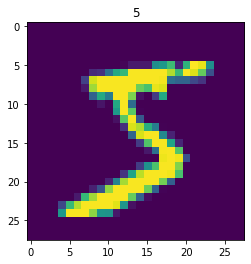

In [44]:
for image,label in mnist_dataset:
    plt.title(label.numpy())
    plt.imshow(image.numpy()[:,:,0])
    plt.show()
    break

## Pandas 数据读取

In [45]:
import pandas as pd

In [47]:
df = pd.read_csv('heart.csv')

In [49]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


In [50]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [51]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes
print(df['thal'])

0      2
1      3
2      4
3      3
4      3
      ..
298    2
299    4
300    4
301    4
302    4
Name: thal, Length: 303, dtype: int8


In [52]:
target = df.pop('target')

In [54]:
dataset = tf.data.Dataset.from_tensor_slices((df.values,target.values))
for feat, targ in dataset.take(5):
    print('Features:{}, Target:{}'.format(feat,targ))

Features:[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   2. ], Target:0
Features:[ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
   3. ], Target:1
Features:[ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
   4. ], Target:0
Features:[ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
   3. ], Target:0
Features:[ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
   3. ], Target:0


## 从Python generator构建数据管道

In [55]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=20)

In [56]:
flowers = './flower_photos/flower_photos/'

In [57]:
def Gen():
    gen = img_gen.flow_from_directory(flowers)
    for (x,y) in gen:
        yield (x,y)

In [58]:
ds = tf.data.Dataset.from_generator(
    Gen,
    output_types=(tf.float32,tf.float32)
)

In [60]:
# for image,label in ds:
#     print(image.shape,label.shape)
#     break

## TextLineDataset类

In [61]:
titanic_lines = tf.data.TextLineDataset(['train.csv','eval.csv'])

In [62]:
def data_func(line):
    line = tf.strings.split(line, sep = ',')
    return line

In [63]:
titanic_data = titanic_lines.skip(1).map(data_func)

In [64]:
for line in titanic_data:
    print(line)
    break

tf.Tensor(
[b'0' b'male' b'22.0' b'1' b'0' b'7.25' b'Third' b'unknown' b'Southampton'
 b'n'], shape=(10,), dtype=string)
